# For Generating the data points

1. Initialise the bounds for the family car
2. Generate random numbers with in the bounds for the family cars
3. To generate the non-family cars which is outside of the bounds, create a 2D random number array
4. Check whether the first point of the coordinate is outside of the bound p1 or p2 or check whether the          second point of the coordinate is outside of the bound e1 or e2     
5.Append the first and second points to seperate arrays and then plot it

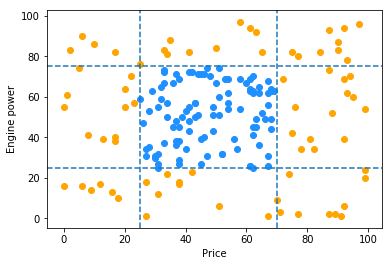

In [39]:
import numpy as np
import random
import matplotlib.pyplot as plt

p1 =  25
p2 =  70
e1 =  25
e2 =  75


#Family Cars
F_price = np.random.randint(p1,p2,100)
F_power = np.random.randint(e1,e2,100)


#Non-Family cars
a = np.random.randint(0,100,(100,2))
NF_price = np.array([])
NF_power = np.array([])

for i in a:
    if (i[0]<p1 or i[0]>p2 or i[1]<e1 or i[1]>e2):
        NF_price = np.append(NF_price,i[0])
        NF_power = np.append(NF_power,i[1])
   


fig,ax = plt.subplots()
ax.scatter(F_price,F_power,label='Family car',color='dodgerblue')
ax.scatter(NF_price,NF_power,label='Non-Family car',color='orange')
ax.set(xlabel='Price',ylabel='Engine power')
ax.axhline(y=e1,xmin=0,xmax=100,linestyle='--')
ax.axhline(y=e2,xmin=0,xmax=100,linestyle='--')
ax.axvline(x=p1,ymin=0,ymax=100,linestyle='--')
ax.axvline(x=p2,ymin=0,ymax=100,linestyle='--');

# For generating whole,train and test data set

1. First column stack the family car and non family cars, price and power
2. Create an array of ones for family car and zeros for non-family car
3. Column stack ones and zeros to corresponding data
4. Then concatenate Family and non-family car data
5. Then create an array of length of the data
6. Shuffle the array and use it as index for taking the random data from the whole data set
7. Seperate the random data set into training and testing data set

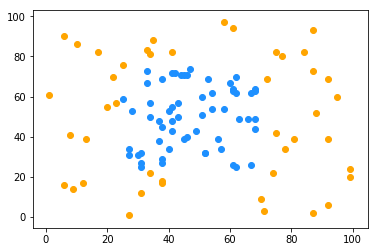

In [40]:
Family_car_data = np.column_stack((F_price,F_power))
r1,c1 = Family_car_data.shape
ones = np.ones(r1)
Family_car_data = np.column_stack((Family_car_data,ones))
# print(Family_car_data)



Non_Family_car_data = np.column_stack((NF_price,NF_power))
r2,c2 = Non_Family_car_data.shape
zeros = np.zeros(r2)
Non_Family_car_data = np.column_stack((Non_Family_car_data,zeros))




Total_data = np.concatenate((Family_car_data,Non_Family_car_data))
# print(Total_data)

n_rows,n_cols = Total_data.shape
n_data = np.arange(n_rows)
np.random.shuffle(n_data)



train_percent  = int(0.6*n_rows)
train_data_idx = n_data[:train_percent]
train_data     = Total_data[train_data_idx]


test_percent   = int(0.4*n_rows)
test_data_idx  = n_data[train_percent:]
test_data      = Total_data[test_data_idx]

# print(training_data)


fig,ax = plt.subplots()
for x,y,z in zip(train_data[:,0],train_data[:,1],train_data[:,2]):
    if z==1:
        c='dodgerblue'
        ax.scatter(x,y,color=c)
    else:
        c='orange'
        ax.scatter(x,y,color=c)
